# Squad Mae C. Jemison

Bootcamp Data Analytics 2024

Projeto Final - Bullying

Autoras:
- Ana Carolina Szczepanski Oliveira
- Claisa  Lubke
- Elis Regina Weiss
- Hanna Câmara da Justa
- Iris Brandao Pires Linhares
- Isabella Stersa de Oliveira
- Larissa das Chagas Brum
- Lidiane Vicente

# Configuração

### Instalação de Bibliotecas

### Importação de Bibliotecas

In [ ]:
# Módulo para interação no ambiente Google Colab
from google.colab import files, drive

# Pré-processamento ou limpeza de dados
import pandas as pd
import numpy as np

# Visualização de dados
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelo de classificação
from sklearn.linear_model import LogisticRegression

# Técnicas para Classes Desbalanceadas
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV

# Avaliação do Modelo
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, accuracy_score, classification_report, precision_score, recall_score

# Interpretação e Explicabilidade de Modelos
import shap

# Módulo para construir tabelas
from tabulate import tabulate

# Avisos
import warnings

## Configuração de avisos

In [ ]:
warnings.filterwarnings('ignore')

## Configuracão de Plotagem

In [ ]:
# Configurações gerais para a plotagem com Plotly
layout = go.Layout(
    # Tamanho padrão das figuras
    width=1200,
    height=800,

    # Resolução da figura
    # Nota: Não há um parâmetro direto para DPI em Plotly; isso é ajustado na exportação da imagem.

    # Configuração da largura e cor das linhas
    template="plotly_white",  # Define uma base com temas claros

    # Tamanho do título dos eixos
    title_font=dict(size=16),

    # Tamanho dos rótulos dos eixos
    xaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),

    # Tamanho da fonte da legenda
    legend=dict(font=dict(size=12)),

    # Transparência da grade
    xaxis_gridcolor="rgba(0, 0, 0, 0.5)",  # Cor e transparência
    yaxis_gridcolor="rgba(0, 0, 0, 0.5)"
)


## Importação dataset

In [ ]:
# Montar drive
drive.mount('/content/drive')

Mounted at /content/drive


## Leitura e criação de dataframe

In [ ]:
# Criação e leitura do dataframe original
df_final_modelagem = pd.read_csv('/content/drive/MyDrive/Projeto Final - Bullying/df_final_modelagem.csv')

# 5. Estágio Quinto - Modelagem



## 5.1. Técnica de modelagem

- Técnica Selecionada: Regressão Logística

- Definição: A Regressão Logística é um modelo estatístico usado para prever a probabilidade de uma variável dependente categórica, geralmente binária. O modelo ajusta uma função logística (sigmoide) para calcular as probabilidades.

- Razoabilidade da escolha: É adequada quando a variável alvo é binária (como "Sim"/"Não").
Interpretação clara dos coeficientes (indica a direção e magnitude do impacto das variáveis preditoras).
Flexibilidade em lidar com variáveis categóricas e contínuas.

- Formulação do Problema:
O objetivo é prever se um evento ocorre (classe positiva) com base nas variáveis explicativas presentes no dataset.

## 5.2. Premissas do modelo

- Tratamento de valores faltantes: Foi criada uma classe No_answer para lidar com valores ausentes nas variáveis explicativas.
- Verificação de Multicolinearidade: Foi realizada uma análise preliminar da matriz de correlação e cálculo do VIF para eliminar ou ajustar preditores correlacionados.
- Codificação das Variáveis: Todas as variáveis categóricas foram devidamente codificadas utilizando técnica como One-Hot Encoding.
- Verificação de outliers: Não foi encontrado valores de outilires
- Escalonar dos dados: Utilizar técnica de StandardScaler para a padronização de dados.
- Distribuição das Variáveis:
Realizou-se análise exploratória para verificar se a relação entre os preditores e a variável alvo segue um padrão coerente.

## 5.3. Construir modelo<a class="anchor" id="BuildModel"></a>
Execute a ferramenta de modelagem no conjunto de dados preparado para criar um ou mais modelos.

**Configurações de parâmetros** - Com qualquer ferramenta de modelagem, geralmente há um grande número de parâmetros que podem ser ajustados. Liste os parâmetros e seus valores escolhidos, juntamente com a justificativa para a escolha das configurações dos parâmetros.

**Modelos** – Estes são os modelos reais produzidos pela ferramenta de modelagem, não um relatório sobre os modelos.

Não houve muita diferença entre os modelos. E se deletar as linhas sem info?

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_final_modelagem.head()

,bullied_at_school,age,bullied_off_school_Yes,cyberbullied_Yes,sex_Female,physically_attacked_0 times,physically_attacked_1 time,physically_attacked_10 or 11 times,physically_attacked_12 or more times,physically_attacked_2 or 3 times,physically_attacked_4 or 5 times,physically_attacked_6 or 7 times,physically_attacked_8 or 9 times,physical_fighting_0 times,physical_fighting_1 time,physical_fighting_10 or 11 times,physical_fighting_12 or more times,physical_fighting_2 or 3 times,physical_fighting_4 or 5 times,physical_fighting_6 or 7 times,physical_fighting_8 or 9 times,felt_lonely_Most of the time,felt_lonely_Never,felt_lonely_Rarely,felt_lonely_Sometimes,close_friends_0,close_friends_1,close_friends_2,close_friends_3 or more,missed_school_no_permission_0 days,missed_school_no_permission_1 or 2 days,missed_school_no_permission_10 or more days,missed_school_no_permission_3 to 5 days,students_kind_and_helpful_Always,students_kind_and_helpful_Most of the time,students_kind_and_helpful_Never,students_kind_and_helpful_Rarely,students_kind_and_helpful_Sometimes,parents_understand_problems_Always,parents_understand_problems_Most of the time,parents_understand_problems_Never,parents_understand_problems_Rarely,parents_understand_problems_Sometimes,often_felt_lonely_Yes,missed_classes_no_permission_Yes,underweight_Yes,overweight_Yes,obese_Yes
0,1,13,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
1,0,13,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,14,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,13,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### 5.3.1 Separar as variaveis explicativas e variavel alvo

In [ ]:
# Selecionando variaveis explicativas
X = df_final_modelagem.drop('bullied_at_school', axis=1)

In [ ]:
# Selecionar variavel alvo
y = df_final_modelagem['bullied_at_school']

###5.3.3. Separar em dados de treino e dados de teste

In [ ]:
X_treino, X_teste, y_treino, y_teste= train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

### 5.3.4. Escalonar os dados de treino e dados de teste

In [ ]:
escalonar = StandardScaler()
X_treino_escalonado = escalonar.fit_transform(X_treino)
X_teste_escalonado = escalonar.transform(X_teste)

Resultados:
- Escalonar separadamente os dados de treino e teste evita data leakage, garantindo que as transformações sejam baseadas apenas no conjunto de treino. Isso assegura uma avaliação justa e simula corretamente como o modelo lidaria com dados novos.

### 5.3.5. Modelo Regressão Logistica

In [ ]:
# Instanciar o modelo de Regressão Logistica
model_LR = LogisticRegression(max_iter=1000, class_weight='balanced')

In [ ]:
# Treinar modelo
model_LR.fit(X_treino, y_treino)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Predizer classe com dados de teste
y_predito = model_LR.predict(X_teste)

In [ ]:
# Exibir relatório de classificação
print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      6576
           1       0.44      0.65      0.52      1786

    accuracy                           0.75      8362
   macro avg       0.66      0.71      0.67      8362
weighted avg       0.79      0.75      0.76      8362



### 5.3.6. Técnicas de Balanceamento
- Técnicas de Balanceamento e Avaliação de Modelos para Classes Desbalanceadas

#### 5.3.6.1. Undersampled

In [ ]:
# Aplicar RandomUnderSampler para balancear as classes
rus = RandomUnderSampler(random_state=42)
X_treino_under, y_treino_under = rus.fit_resample(X_treino_escalonado, y_treino)

# Instanciar e treinar o modelo de Regressão Logística
model_LR_under = LogisticRegression(max_iter=1000, class_weight='balanced')
model_LR_under.fit(X_treino_under, y_treino_under)

# Predizer a classe com os dados de teste
y_pred_under = model_LR_under.predict(X_teste_escalonado)

# Exibir relatório de classificação
print(classification_report(y_teste, y_pred_under))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      6576
           1       0.43      0.65      0.52      1786

    accuracy                           0.74      8362
   macro avg       0.66      0.71      0.67      8362
weighted avg       0.79      0.74      0.76      8362



#### 5.3.6.2. Oversampled

In [ ]:
# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_treino_over, y_treino_over = smote.fit_resample(X_treino_escalonado, y_treino)

# Instanciar e treinar o modelo de Regressão Logística
model_LR_over = LogisticRegression(max_iter=1000, class_weight='balanced')
model_LR_over.fit(X_treino_over, y_treino_over)

# Predizer a classe com os dados de teste
y_pred_over = model_LR_over.predict(X_teste_escalonado)

# Exibir relatório de classificação
print(classification_report(y_teste, y_pred_over))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      6576
           1       0.43      0.64      0.52      1786

    accuracy                           0.75      8362
   macro avg       0.66      0.71      0.67      8362
weighted avg       0.79      0.75      0.76      8362



Resultados:
- Foi necessário aplicar técnicas de balanceamento de classes para a variável-alvo Bullied_at_school, a fim de minimizar o impacto do desbalanceamento nas métricas do modelo.
- Utilizou-se Random Undersampling para reduzir o número de observações da classe majoritária, equilibrando sua representatividade ao diminuir seu peso desproporcional.
- Empregou-se o SMOTE (Synthetic Minority Oversampling Technique) como método de oversampling, gerando novas amostras sintéticas para a classe minoritária, igualando sua representatividade à da classe majoritária.
- Na métrica acurácia, o modelo treinado com oversampling apresentou desempenho ligeiramente superior ao treinado com undersampling, com valores de 0,75 e 0,74, respectivamente.
- Na métrica recall, o modelo com undersampling obteve desempenho ligeiramente melhor do que o com oversampling, com valores de 0,65 e 0,64, respectivamente.
- Isso indica que o undersampling foi mais eficaz em capturar padrões relevantes da classe minoritária.
- Na métrica precision, ambos os métodos apresentaram os mesmos resultados: 0,89 para a classe 0 e 0,43 para a classe 1.
- As métricas do modelo original e do modelo com oversampling foram idênticas, sugerindo que o oversampling não teve impacto significativo no desempenho geral do modelo.

### 5.3.7. GridSearch

In [ ]:
# Definindo o intervalo de parâmetros a serem testados
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularização
    'penalty': ['l1', 'l2', 'elasticnet'],  # Tipos de penalização
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],  # Solvers diferentes
    'max_iter': [100, 200, 500, 1000],  # Iterações para convergência
    'tol': [1e-4, 1e-3, 1e-2],  # Critério de convergência
    'class_weight': ['balanced', None],  # Pesos das classes
    'fit_intercept': [True, False],  # Ajustar o intercepto
    'warm_start': [True, False]  # Se usar soluções anteriores como inicialização
}

In [ ]:
''' # Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model_LR, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Treinando o modelo com GridSearchCV
grid_search.fit(X_treino_escalonado, y_treino)

# Mostrando os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", grid_search.best_params_)
'''

' # Criando o objeto GridSearchCV\ngrid_search = GridSearchCV(estimator=model_LR, param_grid=param_grid, cv=5, scoring=\'recall\', n_jobs=-1, verbose=1)\n\n# Treinando o modelo com GridSearchCV\ngrid_search.fit(X_treino_escalonado, y_treino)\n\n# Mostrando os melhores parâmetros encontrados\nprint("Melhores parâmetros encontrados:", grid_search.best_params_)\n'

Resultados:
- Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
- Melhores hiperparâmetros encontrados: {'C': 10, 'class_weight': 'balanced', 'fit_intercept': False, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001, 'warm_start': True}

In [ ]:
'''
# Treinando o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_

# Predizendo com os dados de teste
y_predito = best_model.predict(X_teste_escalonado)

# Avaliando a performance do modelo
from sklearn.metrics import classification_report, recall_score
print("Acurácia no conjunto de teste:", recall_score(y_teste, y_predito))
print("Relatório de Classificação:\n", classification_report(y_teste, y_predito))
'''

'\n# Treinando o modelo com os melhores parâmetros\nbest_model = grid_search.best_estimator_\n\n# Predizendo com os dados de teste\ny_predito = best_model.predict(X_teste_escalonado)\n\n# Avaliando a performance do modelo\nfrom sklearn.metrics import classification_report, recall_score\nprint("Acurácia no conjunto de teste:", recall_score(y_teste, y_predito))\nprint("Relatório de Classificação:\n", classification_report(y_teste, y_predito))\n'

Resultados:
-  Testar combinações diferentes de parâmetros para encontrar o conjunto que proporciona o melhor desempenho.


#### 5.3.7.1. Modelo de Regressão Logística final

In [ ]:
# Instaciar o modelo de Regressão logistíca com os melhores parâmentros
melhor_model_LR = LogisticRegression(
    C=10,
    class_weight='balanced',
    fit_intercept=False,
    max_iter=1000,
    penalty='l1',
    solver='liblinear',
    tol=0.001,
    warm_start=True
    )

# Treinando o modelo com os parametros encontrados no GridSearchCV
melhor_model_LR.fit(X_treino_escalonado, y_treino)

# Predizendo com os dados de teste
y_predito_melhor = melhor_model_LR.predict(X_teste_escalonado)

# Avaliando a performance do modelo
print("Recall no conjunto de teste:", recall_score(y_teste, y_predito_melhor))
print("Relatório de Classificação:\n", classification_report(y_teste, y_predito_melhor))

Recall no conjunto de teste: 0.6998880179171333
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      6576
           1       0.40      0.70      0.51      1786

    accuracy                           0.71      8362
   macro avg       0.65      0.71      0.65      8362
weighted avg       0.79      0.71      0.73      8362



Resultados:
- O modelo de regressão logística foi otimizado utilizando o GridSearchCV para encontrar os melhores hiperparâmetros, priorizando a métrica de recall, devido à importância de capturar corretamente os casos positivos (classe 1).
- O objetivo é lidar com o desbalanceamento das classes e obter um desempenho satisfatório, especialmente para a classe minoritária.
- Hiperparametros selecinados:
  - C = 10: Regularização adequada para reduzir overfitting.
  - class_weight = 'balanced': Compensação do desbalanceamento das classes.
  - fit_intercept = False: Modelo sem intercepto.
  - max_iter = 1000: Permitiu a convergência do algoritmo.
  - penalty = 'l1': Regularização Lasso, para reduzir coeficientes irrelevantes.
  - solver = 'liblinear': Solver eficiente para problemas menores e com penalização L1.
  - tol = 0.001: Critério mais rigoroso para a convergência.
  - warm_start = True: Reutilização de cálculos anteriores para otimização.

- Métricas:
  - Recall (Classe 1): O modelo atingiu um recall de 0.70, indicando que 70% dos casos positivos foram corretamente identificados. Este é um resultado sólido para a classe minoritária, considerando o desbalanceamento do dataset.
  - Precision (Classe 1): A precisão foi de 0.40, refletindo que 40% das previsões como positivas estavam corretas. Este trade-off é esperado ao priorizar o recall.
  - Acurácia Geral: O modelo obteve uma acurácia de 71%, mas esta métrica não é a mais relevante, devido ao desbalanceamento das classes.
  - F1-Score: Para a classe 1, o F1-score foi 0.51, indicando um equilíbrio moderado entre precisão e recall.
  - O modelo manteve boa precisão (0.90) para a classe majoritária, com um recall de 0.71


##### 5.3.7.1.1. Under após gridsearch

In [ ]:
# Aplicar RandomUnderSampler para balancear as classes
rus_2 = RandomUnderSampler(random_state=42)
X_treino_under, y_treino_under = rus_2.fit_resample(X_treino_escalonado, y_treino)

# Instanciar e treinar o modelo de Regressão Logística
model_LR_under_2 = LogisticRegression(
    C=10,
    class_weight='balanced',
    fit_intercept=False,
    max_iter=1000,
    penalty='l1',
    solver='liblinear',
    tol=0.001,
    warm_start=True
    )
model_LR_under_2.fit(X_treino_under, y_treino_under)

# Predizer a classe com os dados de teste
y_pred_under_2 = model_LR_under_2.predict(X_teste_escalonado)

# Exibir relatório de classificação
print(classification_report(y_teste, y_pred_under_2))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      6576
           1       0.39      0.70      0.50      1786

    accuracy                           0.70      8362
   macro avg       0.64      0.70      0.65      8362
weighted avg       0.79      0.70      0.73      8362



##### 5.3.7.1.2. Over após gridsearch

In [ ]:
# Aplicar SMOTE para balancear as classes
smote_2 = SMOTE(random_state=42)
X_treino_over, y_treino_over = smote_2.fit_resample(X_treino_escalonado, y_treino)

# Instanciar e treinar o modelo de Regressão Logística
model_LR_over_2 = LogisticRegression(
    C=10,
    class_weight='balanced',
    fit_intercept=False,
    max_iter=1000,
    penalty='l1',
    solver='liblinear',
    tol=0.001,
    warm_start=True
    )
model_LR_over_2.fit(X_treino_over, y_treino_over)

# Predizer a classe com os dados de teste
y_pred_over_2 = model_LR_over_2.predict(X_teste_escalonado)

# Exibir relatório de classificação
print(classification_report(y_teste, y_pred_over_2))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6576
           1       0.40      0.69      0.51      1786

    accuracy                           0.71      8362
   macro avg       0.65      0.71      0.65      8362
weighted avg       0.79      0.71      0.73      8362



Resultados:
- Comparação Geral:
  - Recall (Classe 1): Todos os métodos mantêm o recall em 70%, indicando que todos são igualmente eficazes em capturar os casos positivos.
  - Precision (Classe 1): O modelo tunado e o SMOTE mantêm a mesma precisão, enquanto o RandomUnderSampler apresenta uma leve queda (0.39).
  - F1-Score: O modelo tunado e o SMOTE obtêm os melhores resultados com 0.51, indicando o melhor equilíbrio entre precisão e recall.
  - Accuracy: O modelo tunado e o SMOTE também têm a maior acurácia (0.71).

- O modelo tunado (com class_weight='balanced') é a melhor escolha porque:
  - Apresenta o mesmo desempenho do SMOTE, mas com menor complexidade computacional (não precisa gerar amostras sintéticas).
  - Mantém o recall elevado (70%) para a classe minoritária, essencial para o problema.
  - Garante boa precisão e equilíbrio geral entre as métricas.
  - Embora o SMOTE seja uma alternativa viável, ele não trouxe ganhos adicionais significativos em relação ao modelo tunado. O RandomUnderSampler teve desempenho inferior, perdendo informações da classe majoritária e apresentando menor precisão e F1-Score.




## 5.4. Análise as variáveis mais relevantes no modelo.



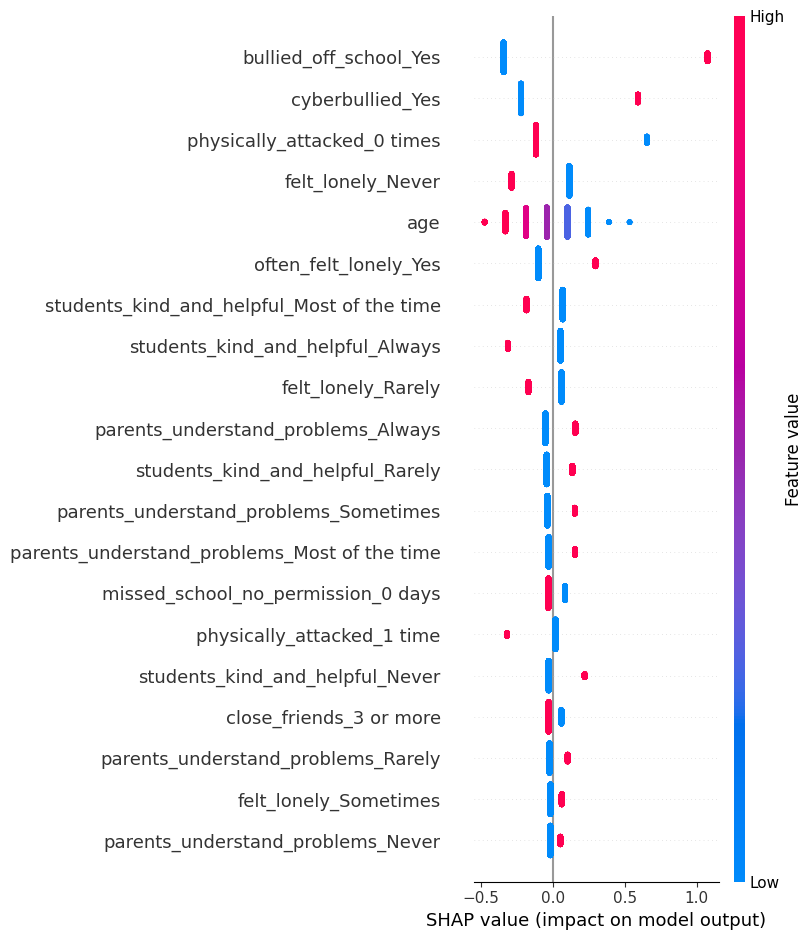

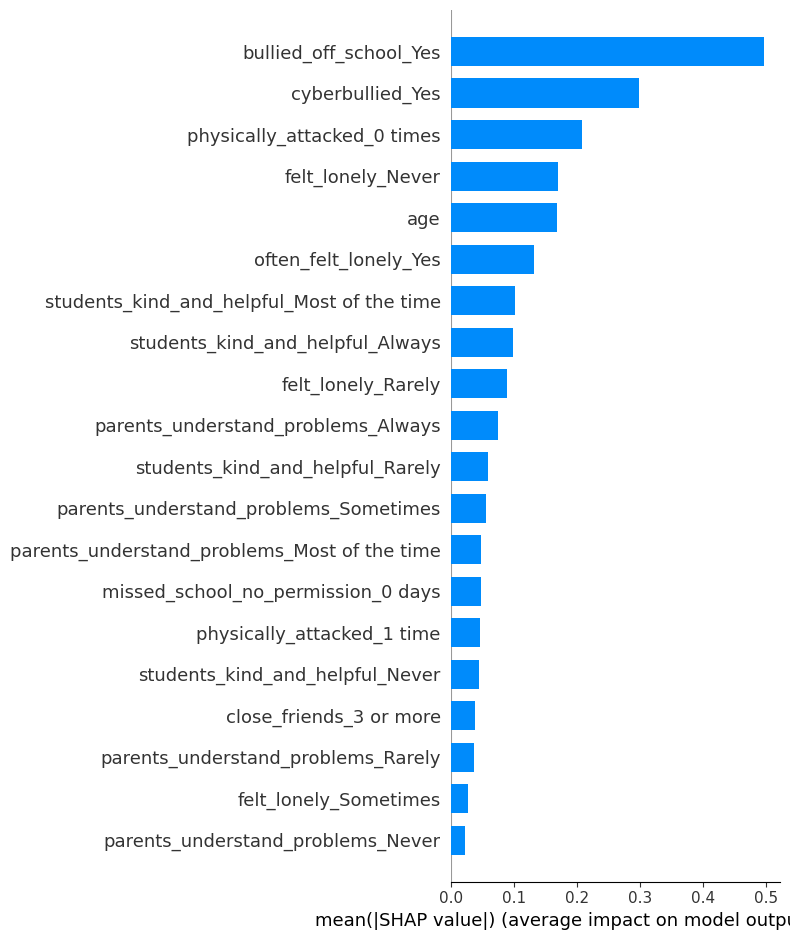

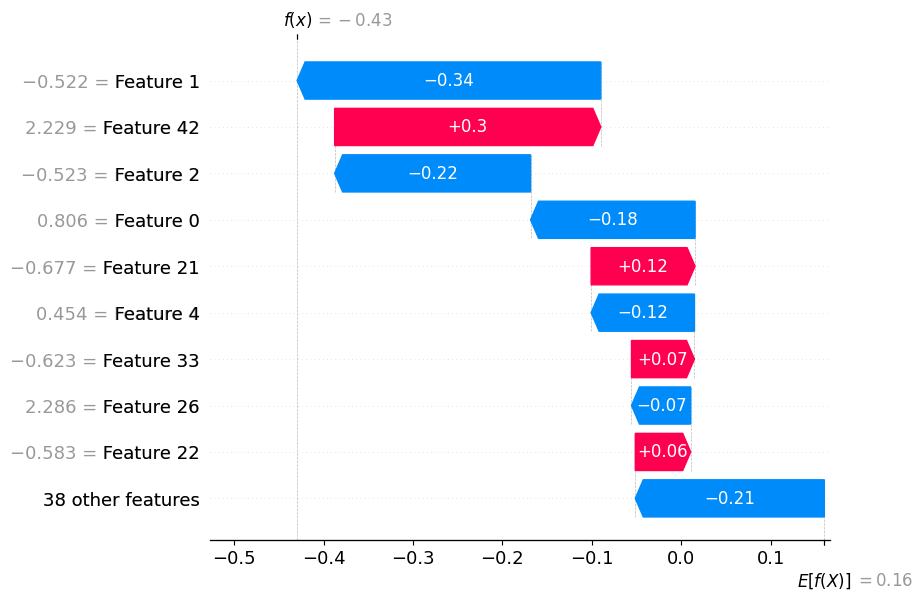

In [ ]:
explicador = shap.Explainer(melhor_model_LR, X_treino_escalonado)

# Calcular os valores SHAP para o conjunto de teste escalonado
valores_shap = explicador(X_teste_escalonado)

# --- Análise das features mais importantes ---
# 1. Resumo global: Gráfico de beeswarm para as features mais importantes
shap.summary_plot(valores_shap, X_teste_escalonado, plot_type="dot", feature_names=X.columns)

# 2. Resumo global: Gráfico de barras para importância média das features
shap.summary_plot(valores_shap, X_teste_escalonado, plot_type="bar", feature_names=X.columns)

# 3. Explicação individual: Gráfico de força para um exemplo
# Selecionar um índice de teste para analisar
indice_exemplo = 0
shap.plots.waterfall(valores_shap[indice_exemplo])

Resultados:
- Os valores SHAP indicam que as seguintes variáveis têm maior impacto na previsão de sofrer bullying (probabilidade estimada pelo modelo):

  - Sofrer bullying fora da escola (bullied_off_school_Yes): A variável com maior impacto no modelo. Isso sugere uma forte relação entre experiências de bullying fora da escola e as experiências dentro da escola.
  - Cyberbullying (cyberbullied_Yes): Também aparece como uma das variáveis mais importantes, evidenciando que os comportamentos de bullying virtual podem ser um importante preditor.
  - Ataques físicos (physically_attacked_0 times): A ausência de ataques físicos parece influenciar fortemente as previsões, possivelmente indicando uma relação inversa.
  - Sentir-se solitário (felt_lonely_Never e felt_lonely_Rarely): A ausência de sentimentos de solidão está fortemente associada a um menor risco de bullying.
  - Sentir-se frequentemente solitário (often_felt_lonely_Yes): Indica um risco maior, sugerindo que a solidão pode ser tanto uma causa quanto um efeito do bullying.
  - Amigos próximos (close_friends_3 or more): Um número maior de amigos próximos pode atuar como um fator de proteção contra o bullying.
Pais compreensivos (parents_understand_problems_Always): O suporte parental consistente está associado a um menor risco.
  - Alunos gentis e prestativos (students_kind_and_helpful_Always, students_kind_and_helpful_Most of the time): Um ambiente escolar acolhedor está associado a um menor risco de bullying.
  - Ausências escolares não autorizadas (missed_school_no_permission_0 days): Menos faltas escolares não autorizadas parecem estar associadas a menor risco, sugerindo que a frequência escolar regular pode ser um fator de proteção.
  - Idade (age): A idade tem uma influência considerável, indicando que diferentes faixas etárias podem ter diferentes probabilidades de sofrer bullying.
  - Sexo (sex_Female): Embora menos impactante, ser do sexo feminino ainda é uma variável relevante.

In [ ]:
# Obtendo os coeficientes do modelo
coefficients = melhor_model_LR.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes em ordem absoluta
indices = np.argsort(np.abs(coefficients))

# Obtendo todas as características e suas importâncias
sorted_features = feature_names[indices]
sorted_importances = coefficients[indices]

# Criando um DataFrame para facilitar a manipulação e exibição
feature_importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Importance': sorted_importances
})

# Plotando com Plotly
fig = px.bar(
    feature_importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Importância das Características no Modelo de Regressão Logística',
    labels={'Importance': 'Importância das Características', 'Feature': 'Características'},
    color='Importance',  # Adiciona cor conforme a importância
    color_continuous_scale='Blues'
)

# Adicionando a barra de cor (color scale) ao lado
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Importância",
        tickvals=[min(sorted_importances), 0, max(sorted_importances)],
        ticktext=[f'{min(sorted_importances):.2f}', '0', f'{max(sorted_importances):.2f}']
    )
)

fig.show()


In [ ]:
# 1. Calcular as médias absolutas dos valores SHAP para cada feature
shap_importances = np.abs(valores_shap.values).mean(axis=0)

# 2. Criar um DataFrame para organizar as features e suas importâncias
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': shap_importances
})

# 3. Ordenar as features por importância e selecionar as top 10
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(24)

In [ ]:
top_features

,Feature,Importance
1,bullied_off_school_Yes,0.496766
2,cyberbullied_Yes,0.297651
4,physically_attacked_0 times,0.207438
21,felt_lonely_Never,0.169766
0,age,0.169016
42,often_felt_lonely_Yes,0.132077
33,students_kind_and_helpful_Most of the time,0.101462
32,students_kind_and_helpful_Always,0.098420
22,felt_lonely_Rarely,0.088807
37,parents_understand_problems_Always,0.075709


## 5.5. Avalie a performance do modelo usando métricas como Acurácia, Precisão, Recall e plote a matriz de confusão.

### 5.5.1. Avaliação do modelo sem undersampling e oversampling

In [ ]:
# Avaliar o modelo
print(classification_report(y_teste, y_predito_melhor, digits=4))

              precision    recall  f1-score   support

           0     0.8973    0.7123    0.7942      6576
           1     0.3978    0.6999    0.5073      1786

    accuracy                         0.7096      8362
   macro avg     0.6476    0.7061    0.6507      8362
weighted avg     0.7906    0.7096    0.7329      8362



Resultados:
  - Mesmo com as métricas muito semelhantes, o modelo sem o under e o over foi o que obteve as melhores métricas.

### 5.5.2. Matrix de Confusão

In [ ]:
# Criar matris de confusão
matrix_confusao = confusion_matrix(y_teste,y_predito_melhor)

# Transformar em DataFrame para visualização
matrix_df = pd.DataFrame(matrix_confusao,
                         index=['No_Real: 0', 'Yes_Real: 1'],
                         columns=['No_Predito: 0', 'Yes_Predito: 1'])

# Criar gráfico usando Plotly
fig = ff.create_annotated_heatmap(z=matrix_confusao,
                                  x=['Predito: 0', 'Predito: 1'],
                                  y=['Real: 0', 'Real: 1'],
                                  colorscale='Blues',
                                  showscale=True)

# Ajustes de layout
fig.update_layout(
    title='Matriz de Confusão',
    xaxis=dict(title='Valores Preditos'),
    yaxis=dict(title='Valores Reais'),
)

fig.show()

Resultados:
  - 4684 (True Negatives - TN): Casos em que a classe real era No e o modelo previu corretamente como No.
  - 1892 (False Positives - FP): Casos em que a classe real era No, mas o modelo previu incorretamente como Yes.
  - 536 (False Negatives - FN): Casos em que a classe real era Yes, mas o modelo previu incorretamente como No.
  - 1250 (True Positives - TP): Casos em que a classe real era Yes e o modelo previu corretamente como Yes.

# 6. Estágio Sexto - Avaliação

O objetivo inicial deste projeto foi classificar estudantes como prováveis vítimas de bullying ("Yes") ou não ("No") e compreender os padrões que influenciam essa ocorrência. A análise exploratória e o modelo preditivo forneceram insights importantes.



## 6.1 Análise Exploratória

**1.   Perfil dos Estudantes:**
- A maioria dos respondentes tem entre 13 e 17 anos, sendo predominantemente estudantes do Ensino Médio.
- Cerca de 55% se identificam como meninas, 40% como meninos e 5% como não-binários ou preferem não responder.


**2. Relações de Vítimas de Bullying:**
- 65% das vítimas relataram conflitos recorrentes com colegas de sala, e 45% apontaram problemas nas redes sociais como as principais fontes de bullying.
- A solidão foi associada a um risco maior de ser vítima de bullying, com a maioria dos participantes mencionando ter se sentido sozinha ou negligenciada.

**3. Variáveis Relevantes:**
- Idade (Age): O coeficiente negativo (-0.1600) sugere que crianças mais velhas têm menor probabilidade de ser vítimas de bullying.
- Bullying Fora da Escola (bullied_off_school_Yes): O coeficiente positivo (1.4238) indica que a experiência de bullying fora da escola está fortemente associada ao bullying escolar.
- Ciberbullying (cyberbullied_Yes): O coeficiente (0.8105) mostra que o ciberbullying é um forte preditor para o bullying escolar.

**4. Outros Padrões:**
- Impacto da Solidão: Estudantes que se sentem mais solitários ou que têm menos amigos têm maior probabilidade de sofrer bullying.
- Comportamento de Ajuda e Apoio Social: Aqueles com uma rede de apoio forte, como amigos ou família, têm menor risco de ser vítimas de bullying.
- Experiências de Violência: O envolvimento em lutas físicas e um histórico de ataques físicos indicam maior vulnerabilidade ao bullying.

## 6.2 Avaliação do Modelo

As métricas utilizadas para avaliar o desempenho do modelo são essenciais para garantir sua eficácia e adequação ao problema. Abaixo estão as métricas aplicadas e suas respectivas análises.

### 1.1 Acurácia

A acurácia é uma das métricas mais comuns para avaliar o desempenho de modelos de classificação. Ela calcula a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões realizadas.

***Acurácia do modelo: ***70.96%

- O modelo está classificando corretamente 70.96% dos casos, o que é uma boa base para o desempenho em um cenário onde as classes estão desbalanceadas. Embora a acurácia forneça uma visão geral do desempenho do modelo, ela pode ser influenciada pelo desbalanceamento entre as classes e, portanto, é importante considerar outras métricas, como precisão, revocação e F1-Score.

### 1.2 Precisão, Revocação e F1-Score

Além da acurácia, as métricas precisão, revocação e F1-Score são essenciais para avaliar a eficácia do modelo, especialmente quando se trata de classes desbalanceadas. Estas métricas fornecem insights sobre como o modelo lida com a identificação de casos de bullying (classe positiva, 1) e casos não-bullying (classe negativa, 0).

***Precisão:*** A precisão é a proporção de casos classificados como bullying que realmente são bullying. Ou seja, quantos dos casos previstos como 1 são realmente positivos.

***Precisão (Classe 1): ***39.78%

- Quando o modelo prevê que um caso é de bullying, ele está correto apenas 39.78% das vezes. Isso sugere que o modelo tende a gerar muitos falsos positivos (casos previstos como bullying que são, na verdade, não bullying).

***Recall (Sensibilidade):***A revocação mede a capacidade do modelo de identificar corretamente os casos de bullying. Em outras palavras, quantos dos casos reais de bullying foram corretamente identificados pelo modelo.

**Recall(Classe 1):**69.99%

- O modelo consegue identificar corretamente 69.99% dos casos reais de bullying. Isso significa que o modelo é razoavelmente bom em detectar bullying quando ele ocorre, mas ainda perde uma parte significativa dos casos (comete falsos negativos).

***F1-Score:*** O F1-Score é a média harmônica entre precisão e revocação, sendo útil para balancear a importância dessas duas métricas quando há um desbalanceamento entre as classes.

***F1-Score (Classe 1):*** 50.73%
- O F1-Score de 50.73% reflete um compromisso entre precisão e revocação. Este valor sugere que o modelo ainda pode ser melhorado, especialmente em relação à precisão, que afeta diretamente o F1-Score.

### 1.3 Matriz de Confusão

A matriz de confusão foi utilizada para visualizar o desempenho do modelo, destacando os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

**Matriz de Confusão**:  
[Inserir visualização da matriz de confusão]

A matriz permite analisar os erros do modelo, como o número de casos de bullying classificados como não bullying (falsos negativos), que é um aspecto crítico para a aplicação em ambientes educacionais.


## 6.3 Limitações Identificadas

**1. Dados Ausentes:**

- Variáveis: Colunas como "underweight", "overweight", "obese" apresentaram cerca de 36,73% dos dados ausentes.
- Imputação: A coluna 'age' foi tratada com a imputação pela mediana, enquanto os dados ausentes na variável-alvo "bullied_at_school" foram removidos para garantir a qualidade dos dados.

**2. Viés nos Dados:**

A amostra pode não representar toda a diversidade da população estudantil, o que limita a generalização dos resultados.

**3. Restrições do Modelo:**

Modelos simples, como regressão logística, podem ter limitações em capturar relações complexas entre as variáveis.

## 6.4 Validação do Modelo

O modelo desenvolvido se alinha de forma eficaz ao problema de negócio, ajudando a identificar padrões acionáveis que podem ser usados para prevenir o bullying. Ele destaca fatores de risco importantes, como o isolamento social e a ocorrência de bullying em outros contextos, oferecendo informações cruciais para a intervenção precoce. Além disso, os insights gerados pelo modelo são claros e compreensíveis para os stakeholders, como professores e psicólogos, permitindo que orientem ações específicas para lidar com o bullying de forma mais eficaz.

Em termos de implementação, o modelo pode ser facilmente integrado em plataformas educacionais, proporcionando uma solução prática para o ambiente escolar. Sua interpretabilidade facilita a adoção por profissionais da educação e saúde, que podem utilizar os resultados para tomar decisões informadas e implementar estratégias de apoio para os estudantes em risco.

## 6.5 Recomendações Futuras

**Recomendações Técnicas:**

- Testar outros algoritmos de classificação, como Random Forest ou Gradient Boosting.
- Explorar técnicas de imputação avançadas para lidar com dados ausentes.


**Recomendações Práticas:**
- Desenvolver dashboards interativos para visualizar padrões de bullying e segmentar por variáveis como idade, gênero e tipo de bullying.
- Oferecer treinamentos para professores e psicólogos sobre como interpretar os resultados e agir com base nas previsões do modelo.

